## Consigne

Le travail attendu pour ces 3 semaines est à faire dans les fichiers `session1.py`, `session2.py`, `session3.py`. 

Les fichiers `session{1|2|3}.py` commenceront par un commentaire avec les noms de leur auteur :

```python
# prenom1 nom1
# prenom2 nom2
```

Une attention particulière sera portée à la qualité de la documentation de votre code.

Cette semaine, il s'agit de travaillr dans session2.py

In [1]:
import session2 as project
import pandas as pd
import numpy as np

# Session 2 - Modélisation d'une microferme en maraîchage diversifié

Dans les microfermes en maraîchage diversifié, les produits récoltés sont souvent vendus en direct aux particuliers sous forme de paniers hebdomadaires. Il faut pour satisfaire la clientèle avoir suffisament de sortes de légumes et suffisament de sortes de légume pour chaque catégorie. Dans la suite, on considère 8 catégories de légume. Le maraîcher choisit donc parmi les **cycles de culture** ceux qui sont adaptés pour respecter les contraintes de quantité et de diversité. La viabilité d'une microferme respectant ces contraintes sera évaluées sur la base du revenu et de la charge de travail qu'elle génère. Le but du projet est de simuler des microfermes de manière aléatoire et d'évaluer leur viabvilité.

## 1 - Simulation d'une microferme

On dispose de deux bases de données issues de la thèse de Kevin Morel qui rassemble les plus de 1000 cycles de culture et qui donne les critères de quantité et de diversité.

La base de données **"cropping_cycles.csv"** contient plus de 1000 cycles de culture avec pour chaque cycle de culture:
- un identifiant entier unique ('ID'), par exemple 233
- le nom en français du légume concerné ('Crop_french'), par exemple 'Tomate cerise'
- la catégorie du légume concerné ('Crop category'), par exemple 'Tomato'
- le nombre de lots minimum par mois de récolte ('Shmin') et maximum total ('Shmax') qu'on peut cultiver pour ce cycle
- la durée de la récolte en mois ('Harvest_last')
- pour chaque mois de l'année, un booléen (0 ou 1) qui indique si le légume cultivé dans ce cycle peut être vendu ('Sale_Jan', 'Sale_Feb', 'Sale_Mar',...)

La base de données **"criteria.csv"** donne pour chaque categorie de légume:
- le nom de la categorie ('Crop category')
- pour chaque mois le nombre minimum de légumes différent de cette catégorie qui doivent être proposés ('Minimal number of crops_1', 'Minimal number of crops_2', ..., 'Minimal number of crops_12')
- pour chaque mois la quantité minimum en nombre de lots de légume proposé dans cette catégorie ('Minimal quantity of shares_1', 'Minimal quantity of shares_2',..., 'Minimal quantity of shares_12')

Dans la base de données, plusieurs scénarios sont disponibles, ici on se restreindra à une stratégie de vente sur 12 mois ('Marketing'='12M') et à des climats modérés ('Climat'='Mild')

#### 1.0 Implémenter les fonctions qui chargent les bases de données ***cropping_cycles*** et ***criteria*** sous forme de dataframe avec pandas.

In [2]:
cropping_cycles = project.get_cropping_cycles_database("data/session2/cropping_cycles.csv")
criteria = project.get_criteria("data/session2/criteria.csv")

#### 1.1 Implémenter la fonction `choose_cycle` qui, pour une catégorie et un mois de vente donnés, choisit un cycle au hasard, le légume étant choisi uniformément parmi ceux possibles. On renverra False si le légume n'est pas requis dans le panier ce mois selon la base ***criteria***, sinon on renverra l'identifiant du cycle.

In [3]:
category = "Potato"
month = 3 #April since month start at 0

cycle_id = project.choose_cycle(category, month, cropping_cycles, criteria)
print(cropping_cycles[cropping_cycles["ID"]==cycle_id])
print(cropping_cycles[cropping_cycles["ID"]==cycle_id]["Sale_Apr"])

                     Crop_french   ID  Seq Prod_loc Climate Marketing  \
540  Pomme de terre conservation  514  NaN    Field    Mild       12M   

     Settingup  Harvest_start  Harvest_end Winter_storage  ...  Growing_Mar  \
540          3              9            9            yes  ...            1   

     Growing_Apr Growing_May  Growing_Jun  Growing_Jul  Growing_Aug  \
540            1           1            1            1            1   

     Growing_Sep  Growing_Oct  Growing_Nov  Growing_Dec  
540            1            0            0            0  

[1 rows x 41 columns]
540    1
Name: Sale_Apr, dtype: int64


#### 1.2 On maintient un dictionaire ou une liste d'objet qui contient les identifiants de cycle et leur nombre de lots associé. Implémenter la fonction suivante qui met à jour le nombre de lot pour un cycle donné. On attribuera le nombre minimum de lots la première fois que le cycle est tiré, et on incrémente de 1 les fois suivantes où on tire ce cycle, en limitant à Shmax. 

In [4]:
cycles={}
cycle_id = 516
cycle = cropping_cycles[cropping_cycles["ID"]==cycle_id]
cycles = project.update_shares(cycle, cycles, cropping_cycles)
print(cycles)

{516: 2}


#### 1.3 Implémenter la fonction qui répartit les lots sur les mois où la vente est possible pour ce mois. Elle renvoie une liste avec pour chaque mois le nombres de lots à vendre.

In [5]:
monthly_shares ={}

cycle_id = int(cycle["ID"].to_numpy()[0])
monthly_shares[cycle_id] = project.spread_shares(cycle, cycles, cropping_cycles)
print(monthly_shares)

{516: [0.25, 0.25, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.25, 0.25]}


#### 1.5 Implémenter les fonctions qui renvoient True ou False selon que les critères de quantité et de diversité sont vérifés. 

In [6]:
criteria_potato = criteria[criteria["Crop category"]==category]

quant = project.check_quant(monthly_shares, criteria_potato, month) #on vérifie le critère de quantité pour un seul mois
div = project.check_div(monthly_shares, cropping_cycles, criteria) #on vérifie le critère de diversité pour toute l'année
print("Quantity crit.: %s, Diversity crit.: %s"%(quant, div))

Quantity crit.: False, Diversity crit.: False


#### 1.6 Implémenter une fonction qui pour un catégorie de légume donnée renvoie un panier qui respecte les contraintes de diversité et de quantité (un dictionaire avec comme index l'id du cycle et en valeur le nombre de lot par an). 

In [7]:
Box_cat,_ = project.get_box_cat(category, criteria, cropping_cycles)
print(Box_cat)

{517: 8, 516: 9, 514: 7, 524: 1, 523: 2, 518: 3, 519: 6, 515: 8, 520: 1}


#### 1.7 Implémenter une fonction qui renvoie N paniers (on pourra sauvegarder le résultat en json ou csv.)

In [8]:
N = 10 #10000
categories = np.unique(cropping_cycles["Crop category"])    

boxes = project.get_N_boxes(N, criteria, cropping_cycles, categories) 
print(boxes[0])

Les paniers ont été sauvegardés dans 'boxes.csv' avec succès !
{'Carrot': {339: 5, 336: 3, 337: 6, 329: 1, 328: 2, 330: 8, 331: 1, 335: 5, 326: 3, 332: 2, 334: 7}, 'Condiment crop': {403: 4, 301: 5, 401: 1, 292: 6, 490: 2, 297: 5, 293: 4, 400: 3, 399: 3, 402: 5, 492: 5, 298: 5, 491: 6, 299: 6, 295: 1, 294: 2, 493: 1, 496: 4}, 'Cooked green': {356: 6, 502: 4, 308: 6, 413: 1, 420: 1, 360: 2, 305: 3, 366: 3, 419: 1, 368: 4, 422: 3, 411: 3, 365: 2, 378: 2, 408: 2, 358: 2, 415: 4, 503: 4, 352: 2}, 'Fruit crop': {390: 5, 388: 11, 425: 4, 505: 2, 454: 2, 512: 8, 435: 6, 394: 8, 436: 4, 387: 5, 504: 2, 397: 20, 453: 2, 385: 12, 389: 5, 513: 6, 382: 16, 423: 2}, 'Potato': {517: 8, 516: 9, 521: 2, 524: 1, 519: 6, 518: 3, 514: 8, 520: 2, 515: 7}, 'Raw green': {452: 2, 474: 5, 468: 3, 459: 4, 547: 1, 465: 4, 551: 2, 462: 6, 350: 2, 467: 3, 440: 2, 469: 2, 560: 2, 446: 1, 447: 1, 472: 3, 550: 1, 553: 1, 349: 2, 405: 1, 546: 2, 566: 2, 348: 2, 448: 2}, 'Root crop': {543: 4, 542: 5, 346: 1, 540: 3, 5

## 2 Estimation de la viabilité d'une microferme

On suppose que le rendement $Y_c$ pour le système de production s, pour la ferme f et le légume c (en lots par $m^2$ s'écrit):
$$log(Y_c) = a_s + a_f + a_c + r$$

où les $e_s$, $e_f$ et $r$ suivent des lois normales $\mathcal{N}(m, \sigma)$ et décrivent les effets du système de production, de la ferme considérée et des effets aléatoires respectivement. Les paramètres de ces lois sont donnés dans le tableau suivante:

|Paramètre| m    | $\sigma$ |
|---------|------|----------|
|$a_s$    | 0.74 |      0.12|
|$a_f$    | 0. |        0.42|
|$r$      | 0. |        0.14|

de même la charge de travail en heures par $m²$ $W_c$ pour le système de production s, pour la ferme f et le légume c s'écrit:

$$log(W_c) = b_s + b_f + b_c + s$$

|Paramètre| m    | $\sigma$ |
|---------|------|----------|
|$b_s$    | 2.72 |      0.19|
|$b_f$    | 0. |        0.36|
|$s$      | 0. |        0.21|



On dispose d'une base de données **'Crop_properties.csv'** qui donne pour chaque légume:
* son prix au kilo 
* la quantité par lot en kg
* les paramètres $a_c$ et $b_c$ qui décrivent l'effet du légume sur le rendement et la charge de travail.

#### 2.1 Calculer pour chaque microferme simulée son profit en euros par $m^2$ ainsi que la charge de travail associée en heures/$m^2$

In [9]:
crop_properties = pd.read_csv("data/session2/crop_properties.csv")
workload, CA = project.compute_CA_workload(boxes[0], crop_properties)
print(workload, CA)

2297.218011039546 1085.5348999999997


#### 2.2 Calculer la surface puis le chiffre d'affaire correspondant à 1800 heures de travail. 

In [10]:
ws = []
CAs = []
for box in boxes:
   workload, CA = project.compute_CA_workload(box, crop_properties)
   ws.append(workload)
   CAs.append(CA) 
print(np.array(ws))
print(np.array(CAs))

workload_total=1800
CA_total = project.compute_CA(np.array(ws), np.array(CAs), workload_total)
print(CA_total)

[2299.02185873 2444.7724514  2239.00603426 2188.50975242 2258.95334925
 2462.09897687 2154.94488122 2434.90123815 2629.29067773 2529.97267102]
[1085.5349 1106.1571 1115.9161 1057.1088 1087.3786 1138.7967 1123.9916
 1401.0045 1090.7611 1365.6713]
[ 849.9105011   814.42458126  897.11637631  869.44818861  866.45502469
  832.5555062   938.85690424 1035.69215067  746.72990576  971.63434537]


#### 2.3 Calculer la probabilité qu'une microferme fasse un chiffre d'affaire de plus de 40000 euros par an avec une charge de travail inférieure à 1800 heures par an.

In [14]:
workload_max=1800
CA_min=840
proba_viable = project.compute_probability_viable(boxes, CA_min, workload_max, crop_properties)
print(proba_viable)

0.7


#### 2.4 Faire la figure représentant la distribution jointe de chiffre d'affaire et charge de travail par m^2

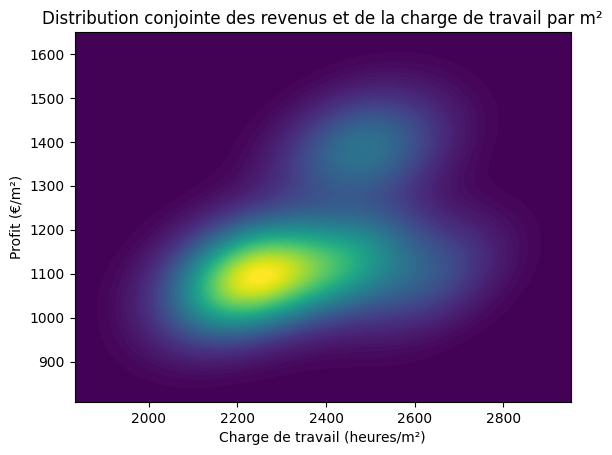

In [12]:
project.figure_distribution(ws,CAs)

## La zone la plus dense, visible en jaune, se situe autour de 2200-2400 heures/m**2 pour la charge de travail et environ 1100-1200 €/m**2 pour le profit. Cela suggère que la majorité des observations se concentrent dans cette plage de valeurs, ce qui pourrait être la configuration de travail la plus courante 

![title](WP_dist.png)

Faire la figure qui montre la distribution du chiffre d'affaire annuel.

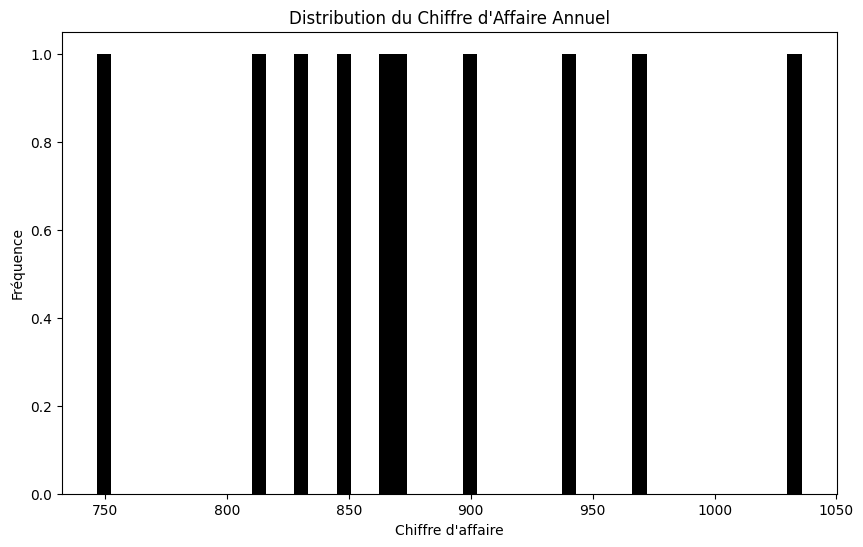

In [13]:
project.figure_CAtot(CA_total)

# Je vais maintenant commenter le graphique présenté, car mon ordinateur met trop de temps pour effectuer une simulation de 100 000 points.
## Ce graphique suggère que, pour une charge de travail de 1800 heures, la majorité des entreprises ou des cas observés génèrent un chiffre d'affaires modéré (autour de 30 000 à 50 000 €), tandis que les très hauts chiffres d'affaires sont beaucoup moins fréquents.
## La distribution asymétrique à droite peut être liée à la nature des revenus, où il est difficile d'atteindre des chiffres d'affaires très élevés malgré une même charge de travail.

![title](CA.png)